<a href="https://colab.research.google.com/github/AbdulsemedShalo/DDOS-Detection-and-Mitigation/blob/main/AccuracyAndConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BENIGN           13660
DoS Hulk         11663
DoS slowloris     4676
Name: Label, dtype: int64
Decision Tree Classiffier Accuracy: 0.9996666666666667
++++++++++++ Confusion Matrix and Classification report for Decision Tree Classifier ++++++++++++++++
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2707
           1       1.00      1.00      1.00      2330
           2       1.00      1.00      1.00       963

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

[[2707    0    0]
 [   0 2328    2]
 [   0    0  963]]
****************************************************************************************************
Decision Tree with Max Depth Accuracy: 0.9968333333333333
++++++++++++ Confusion Matrix and Classification report for Decision Tree with Max Depth Classifier ++++++++++++++++
              precision    recall  f

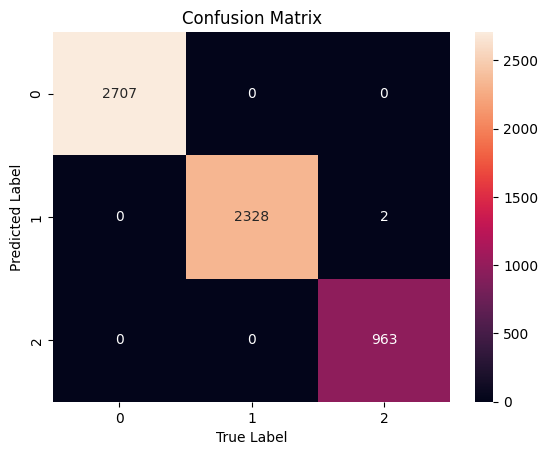

*********************************************************************************************************
K-Nearest Neighbour Accuracy: 0.976
++++++++++++ Confusion Matrix and Classification report for K-Nearest Neighbour Algorithm ++++++++++++++++
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2707
           1       1.00      1.00      1.00      2330
           2       1.00      1.00      1.00       963

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

[[2707    0    0]
 [   0 2328    2]
 [   0    0  963]]
*********************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.9246666666666666
++++++++++++ Confusion Matrix and Classification report for Logistic Regression algorithm ++++++++++++++++
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2707
           1       0.96      0.86      0.91      2330
           2       0.92      0.89      0.91       963

    accuracy                           0.92      6000
   macro avg       0.93      0.91      0.92      6000
weighted avg       0.93      0.92      0.92      6000

[[2678   21    8]
 [ 254 2011   65]
 [  31   73  859]]
*********************************************************************************************************
SVM Classifier Accuracy: 0.7503333333333333
++++++++++++ Confusion Matrix and Classification report for SVM algorithm +++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      2707
           1       0.91      0.42  

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


DatasetUrl = 'https://raw.githubusercontent.com/AbdulsemedShalo/DDOS-Detection-and-Mitigation/main/Dataset.csv'
data = pd.read_csv(DatasetUrl)

data = data.drop("Source.IP", axis=1)
data = data.drop("Destination.IP", axis=1)

# Get the number of frequencies
num_frequencies = data['Label'].value_counts()
# Print the number of frequencies
print(num_frequencies)

label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Extraxt the features you want to base the foundation of our model training
features = ['Max_Packet_Length','Fwd_Packet_Length_Max','Flow_Packets_Sec','Flow_Bytes_Sec','Packet_Length_Std'
           ,'Packet_Length_Variance','Flow_IAT_Max','Fwd_IAT_Max','Subflow_Fwd_Bytes','Fwd_Packet_Length_Std'
           ,'Bwd_Packets_Sec','min_seg_size_forward','Init_Win_bytes_backward','Average_Packet_Size'
           ,'Packet_Length_Mean','Fwd_IAT_Total','Flow_IAT_Std','Fwd_IAT_Std','Avg_Fwd_Segment_Size'
           ,'Fwd_Packet_Length_Mean','Fwd_Header_Length','Fwd_IAT_Mean','Flow_IAT_Mean','Idle_Max'
           ,'Idle_Mean','Fwd_Packets_Sec']


# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)

data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)

data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)

data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data["Label"], test_size=0.2, random_state=1)




#DEscision Tree Accuracy
dectreClassifier = DecisionTreeClassifier()
dectreClassifier = dectreClassifier.fit(X_train,y_train)
y_pred = dectreClassifier.predict(X_test)
print("Decision Tree Classiffier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("++++++++++++ Confusion Matrix and Classification report for Decision Tree Classifier ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("****************************************************************************************************")

# Decision Tree with Max Depth 3
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
dt_pred1 = clf.predict(X_test)
print("Decision Tree with Max Depth Accuracy:",metrics.accuracy_score(y_test, dt_pred1))
print("++++++++++++ Confusion Matrix and Classification report for Decision Tree with Max Depth Classifier ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*****************************************************************************************************")

# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
rmfClassifier.fit(X_train, y_train)
predictions = rmfClassifier.predict(X_test)
print('Random Forest Classifier Accuracy:', rmfClassifier.score(X_test, y_test))
print("++++++++++++ Confusion Matrix and Classification report for Random Forest Classifier ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*********************************************************************************************************")

# create gaussian naive bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,y_train)
naiveBayesPreddiction = naiveBayes.predict(X_test)
print("Naive Bayes's  Algorithm Accuracy: ",metrics.accuracy_score(y_test,naiveBayesPreddiction))
print("++++++++++++ Confusion Matrix and Classification report for Naive Bayes's  Algorithm ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*********************************************************************************************************")


#K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_train, y_train)
predictions = knClassifier.predict(X_test)
print('K-Nearest Neighbour Accuracy:', knClassifier.score(X_test, y_test))
print("++++++++++++ Confusion Matrix and Classification report for K-Nearest Neighbour Algorithm ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*********************************************************************************************************")

# Logistic Regression algorithm
logRegression = LogisticRegression()
logRegression.fit(X_train, y_train)
y_pred = logRegression.predict(X_test)
print("Logistic Regression algorithm Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("++++++++++++ Confusion Matrix and Classification report for Logistic Regression algorithm ++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*********************************************************************************************************")


# Create an SVM classifier
svmClassifier = svm.SVC(kernel='rbf')
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
print("SVM Classifier Accuracy:", svmClassifier.score(X_test, y_test))
print("++++++++++++ Confusion Matrix and Classification report for SVM algorithm +++++++++++++++++++++++++++++")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("*********************************************************************************************************")




